<a href="https://colab.research.google.com/github/karthikkodakandla/dataset/blob/master/Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
print(tf.__version__)

2.3.0


In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv')

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
df.shape

(615, 13)

In [ ]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
df['Category'].describe()

count               615
unique                5
top       0=Blood Donor
freq                533
Name: Category, dtype: object

In [ ]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [ ]:
df.isnull().sum()

Age                       0
ALB                       0
ALP                       0
ALT                       0
AST                       0
BIL                       0
CHE                       0
CHOL                      0
CREA                      0
GGT                       0
PROT                      0
FeMale                    0
Male                      0
0=Blood Donor             0
0s=suspect Blood Donor    0
1=Hepatitis               0
2=Fibrosis                0
3=Cirrhosis               0
dtype: int64

In [ ]:
for i in df.columns[df.isnull().any(axis=0)]:
  df[i].fillna(df[i].mean(),inplace = True)


In [ ]:
y = OneHotEncoder().fit_transform(df).toarray()

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Sex','Category']]).toarray())
# merge with main df bridge_df on key values
df = df.join(enc_df)


In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,0,1,2,3,4,5,6
0,0=Blood Donor,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0=Blood Donor,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0=Blood Donor,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0=Blood Donor,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0=Blood Donor,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,3=Cirrhosis,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,3=Cirrhosis,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
613,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.rename({0 : 'FeMale',1:'Male'}, axis=1,inplace=True)

In [ ]:
df.rename({2:'0=Blood Donor',3:'0s=suspect Blood Donor',4:'1=Hepatitis',5:'2=Fibrosis',6:'3=Cirrhosis'}, axis=1, inplace=True)

In [ ]:
del df['Category']

In [ ]:
del df['Sex']

In [ ]:
df = df.reindex(
    np.random.permutation(df.index))
df.columns

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT', 'FeMale', 'Male', '0=Blood Donor', '0s=suspect Blood Donor',
       '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'],
      dtype='object')

In [ ]:
def preprocess_features(df1):
  selected_features = df1.iloc[:,:13]
  processed_features = selected_features.copy()
  return processed_features

def preprocess_targets(df1):
  output_targets = df1.iloc[:,13:]
  return output_targets

  Training and validation 

In [ ]:
# Choose the first 500 examples for training.
training_examples = preprocess_features(df.head(500))
training_targets = preprocess_targets(df.head(500))

# Choose the 115 examples for validation.
validation_examples = preprocess_features(df.tail(115))
validation_targets = preprocess_targets(df.tail(115))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())




Training examples summary:


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,FeMale,Male
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,47.440000,41.801640,68.889550,28.792902,34.343800,11.50200,8.271720,5.383769,81.46080,39.113200,72.235688,0.380000,0.620000
std,9.893947,5.679441,26.535232,25.125471,32.739852,19.79633,2.179886,1.119274,50.86239,56.978524,4.943680,0.485873,0.485873
min,19.000000,14.900000,11.300000,0.900000,12.000000,0.80000,1.420000,1.430000,8.00000,4.500000,47.000000,0.000000,0.000000
25%,40.000000,39.000000,54.250000,16.900000,21.475000,5.30000,6.977500,4.617500,68.00000,15.800000,69.800000,0.000000,0.000000
50%,47.000000,42.000000,67.800000,23.050000,25.650000,7.30000,8.360000,5.310000,77.00000,23.250000,72.200000,0.000000,1.000000
75%,55.000000,45.300000,79.950000,33.100000,32.150000,11.10000,9.640000,6.090000,89.00000,38.950000,75.400000,1.000000,1.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.00000,15.430000,9.030000,1079.10000,650.900000,86.000000,1.000000,1.000000


Validation examples summary:


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,FeMale,Male
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,47.269565,40.831304,65.650745,26.963478,36.710435,10.939130,7.870174,5.299971,80.535652,41.359130,71.211304,0.417391,0.582609
std,10.772220,6.141609,21.241739,26.873636,34.656896,19.206426,2.295664,1.143958,44.827220,43.329429,7.008063,0.495287,0.495287
min,29.000000,20.300000,22.900000,1.300000,10.600000,2.100000,1.660000,3.010000,29.000000,6.400000,44.800000,0.000000,0.000000
25%,38.000000,38.050000,50.450000,15.050000,22.050000,5.000000,6.605000,4.630000,66.850000,15.250000,68.300000,0.000000,0.000000
50%,47.000000,41.400000,65.000000,22.700000,27.900000,7.100000,8.020000,5.290000,74.000000,23.900000,72.000000,0.000000,1.000000
75%,54.000000,44.750000,77.850000,32.450000,35.450000,11.450000,9.300000,5.880000,87.500000,46.400000,75.450000,1.000000,1.000000
max,76.000000,59.800000,137.800000,258.000000,285.800000,200.000000,16.410000,9.670000,519.000000,218.300000,90.000000,1.000000,1.000000


In [ ]:
baseline_model = keras.Sequential([
    keras.layers.Dense(8, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(5, activation = tf.nn.softmax)

  ])

baseline_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [ ]:
print(max(b_history.history['val_accuracy']))

0.9130434989929199


In [ ]:
results = baseline_model.evaluate(validation_examples, validation_targets , batch_size= 128)
print(results)

1/1 [==============================] - 0s 1ms/step - loss: 0.5670 - accuracy: 0.8957
[0.5670018196105957, 0.895652174949646]


In [ ]:
valpreds = baseline_model.predict_on_batch(validation_examples)
valpreds.argmax(axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 2, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0])

In [ ]:
validation_targets

Normalized data

In [ ]:
#Normalized Training and Validation data
from sklearn.compose import ColumnTransformer
training_examples_norm = preprocess_features(df.head(500))
training_targets_norm = preprocess_targets(df.head(500))
ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'])
    ], remainder='passthrough')

scaledf=ct.fit_transform(training_examples_norm)
#scaler = StandardScaler().fit(training_examples_norm.values)
#scaledf = scaler.transform(training_examples_norm.values)
training_examples_norm = pd.DataFrame(scaledf, index=training_examples_norm.index, columns=training_examples_norm.columns)


# Choose the 20 examples for validation.
validation_examples_norm = preprocess_features(df.tail(115))
#vscaled = scaler.transform(validation_examples_norm.values)
#validation_examples_norm = pd.DataFrame(vscaled, index=validation_examples_norm.index, columns=validation_examples_norm.columns)
validation_targets_norm = preprocess_targets(df.tail(115))
print(training_examples_norm.head())

          Age       ALB       ALP       ALT  ...       GGT      PROT  FeMale  Male
469  0.461349  1.709336  0.487027 -0.099317  ... -0.400783  2.017584     1.0   0.0
592 -0.044516  0.034961 -0.022846  5.187465  ...  2.844035  1.369645     0.0   1.0
265  1.068388 -0.088414 -0.376841 -0.637159  ... -0.497408 -0.432436     0.0   1.0
84  -0.853901  0.369836  0.800132  2.354833  ...  1.057365 -1.222112     0.0   1.0
109 -0.550382  0.405086 -0.833295 -0.198918  ... -0.341052  0.154759     0.0   1.0

[5 rows x 13 columns]


In [ ]:
l1_model = keras.Sequential([
    keras.layers.Dense(32,  activation=tf.nn.relu,
                       input_shape=(training_examples_norm.shape[1],)),
    # keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    # keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    # keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(8, activation = tf.nn.softmax),
    keras.layers.Dense(5, activation = tf.nn.softmax)
  ])

l1_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#l1_model.summary()
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
l1_history = l1_model.fit(training_examples_norm, training_targets_norm, epochs=EPOCHS,
                    validation_data= (validation_examples_norm, validation_targets_norm), verbose=0,
                    callbacks=[PrintDot()])

print(max(l1_history.history['val_accuracy']))


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................0.852173924446106


In [ ]:
l2_model = keras.Sequential([
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples_norm.shape[1],)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(5, activation = tf.nn.softmax)
  ])
l2_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#l2_model.summary()
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
l2_history = l2_model.fit(training_examples_norm, training_targets_norm, epochs=EPOCHS,
                    validation_data= (validation_examples_norm, validation_targets_norm), verbose=1,
                    callbacks=[PrintDot()])

Epoch 1/500
16/16 [==============================] - 0s 15ms/step - loss: 5.2091 - accuracy: 0.1440 - val_loss: 7.4173 - val_accuracy: 0.0435
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 4.7723 - accuracy: 0.6720 - val_loss: 5.8770 - val_accuracy: 0.0957
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 4.3891 - accuracy: 0.8640 - val_loss: 4.9623 - val_accuracy: 0.8000
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 4.0325 - accuracy: 0.8800 - val_loss: 4.5428 - val_accuracy: 0.8174
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 3.6880 - accuracy: 0.8800 - val_loss: 4.4224 - val_accuracy: 0.8174
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 3.3537 - accuracy: 0.8800 - val_loss: 4.3621 - val_accuracy: 0.8087
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 3.0381 - accuracy: 0.8800 - val_loss: 4.0877 - val_accuracy: 0.8087
Epoch 8/500


In [ ]:

print(max(l2_history.history['val_accuracy']))

0.8086956739425659
0.8086956739425659


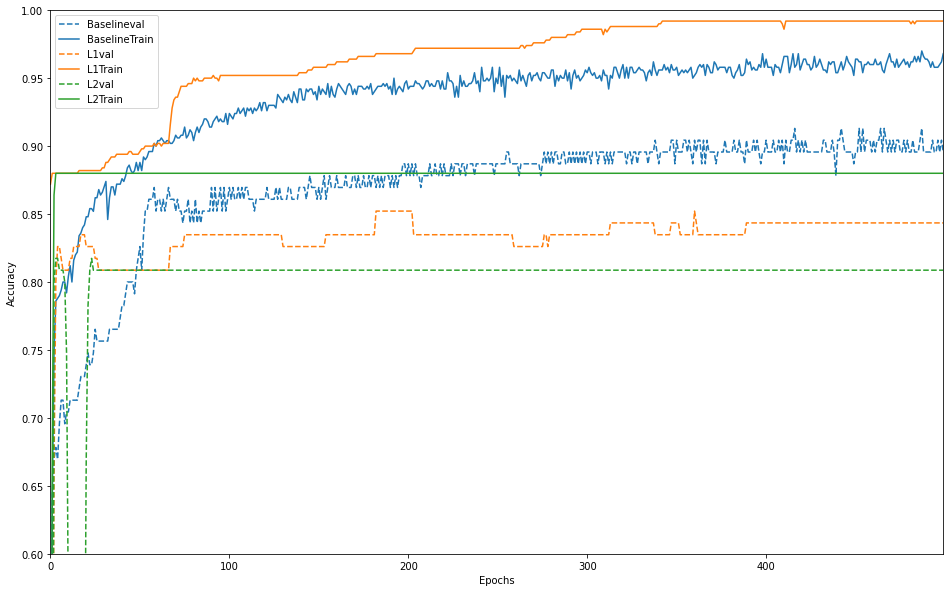

In [ ]:
import matplotlib.pyplot as plt
def plot_history(histories, key ='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label = name.title()+ 'val')
    plt.plot(history.epoch,history.history[key], color=val[0].get_color(),
             label =name.title()+'Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_','').title())
    plt.legend()
    

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0.6,1])
plot_history([('baseline', b_history),('L1',l1_history),('L2',l2_history)])